In [16]:
!pip install yfinance

In [18]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [19]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2022-10-24 00:00:00-04:00,102.089996,103.099998,100.300003,102.970001,102.970001,24680800
247,2022-10-25 00:00:00-04:00,103.300003,105.099998,103.019997,104.930000,104.930000,29910200
248,2022-10-26 00:00:00-04:00,96.760002,98.540001,94.570000,94.820000,94.820000,71504300
249,2022-10-27 00:00:00-04:00,94.309998,95.169998,91.900002,92.599998,92.599998,54036500
250,2022-10-28 00:00:00-04:00,92.529999,96.855598,92.322502,96.580002,96.580002,34901667


In [21]:
data.head()

,Date,Close
0,2021-11-01 00:00:00-04:00,143.774002
1,2021-11-02 00:00:00-04:00,145.863007
2,2021-11-03 00:00:00-04:00,146.789993
3,2021-11-04 00:00:00-04:00,148.682999
4,2021-11-05 00:00:00-04:00,149.240997


In [20]:
data=data[["Date", "Close"]]
data.tail()

,Date,Close
246,2022-10-24 00:00:00-04:00,102.970001
247,2022-10-25 00:00:00-04:00,104.930000
248,2022-10-26 00:00:00-04:00,94.820000
249,2022-10-27 00:00:00-04:00,92.599998
250,2022-10-28 00:00:00-04:00,96.580002


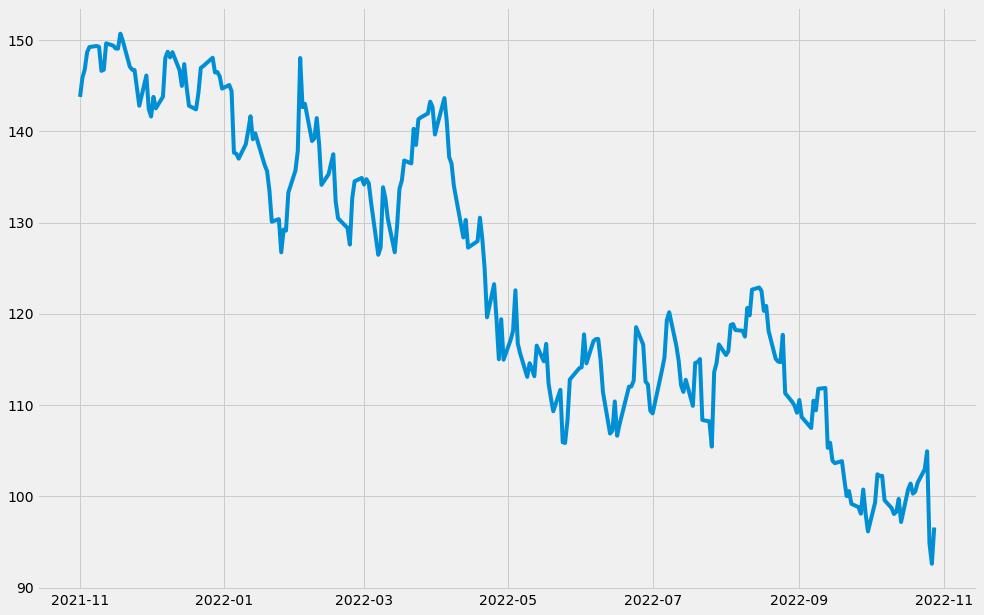

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])

<Figure size 432x288 with 0 Axes>

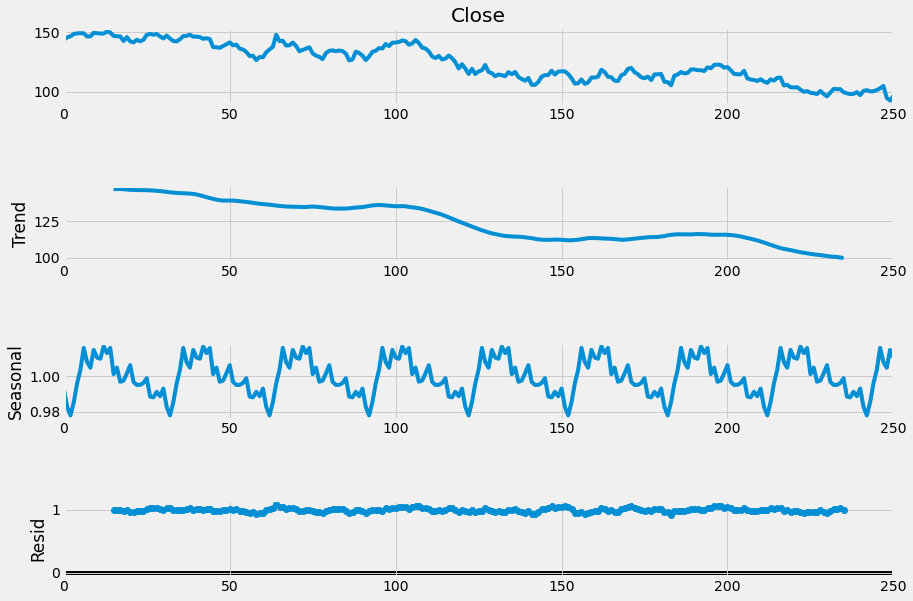

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data["Close"], model='multiplicative',period=30)

fig=plt.figure()
fig=result.plot()
fig.set_size_inches(15,10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

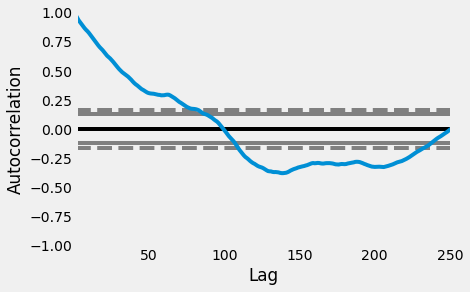

In [25]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\Anurag Rana\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


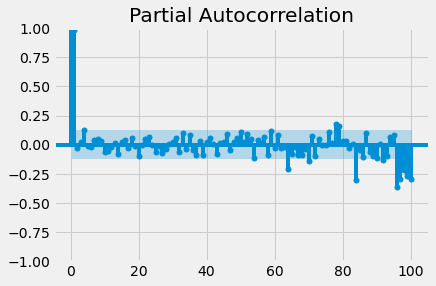

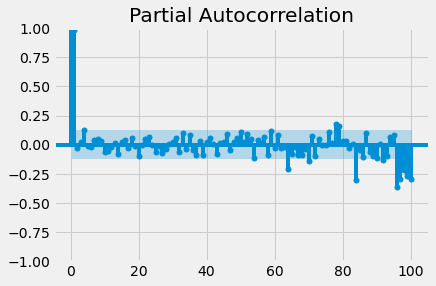

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags=100)

In [28]:
p,d,q=5,1,2
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(p,d,q), seasonal_order=(p,d,q,12))

model=model.fit()
print(model.summary())

C:\Users\Anurag Rana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Anurag Rana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Anurag Rana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -588.174
Date:                            Sun, 30 Oct 2022   AIC                           1206.347
Time:                                    09:57:22   BIC                           1258.431
Sample:                                         0   HQIC                          1227.338
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1138      0.107     -1.060      0.289      -0.324       0.097
ar.L2          0.8994      0.109   

In [30]:
predictions=model.predict(len(data),len(data)+10)
print(predictions)

251    96.730286
252    97.581907
253    96.070013
254    96.224393
255    96.188862
256    98.422624
257    97.812221
258    97.178371
259    96.235381
260    95.818725
261    94.812505
Name: predicted_mean, dtype: float64


<AxesSubplot:>

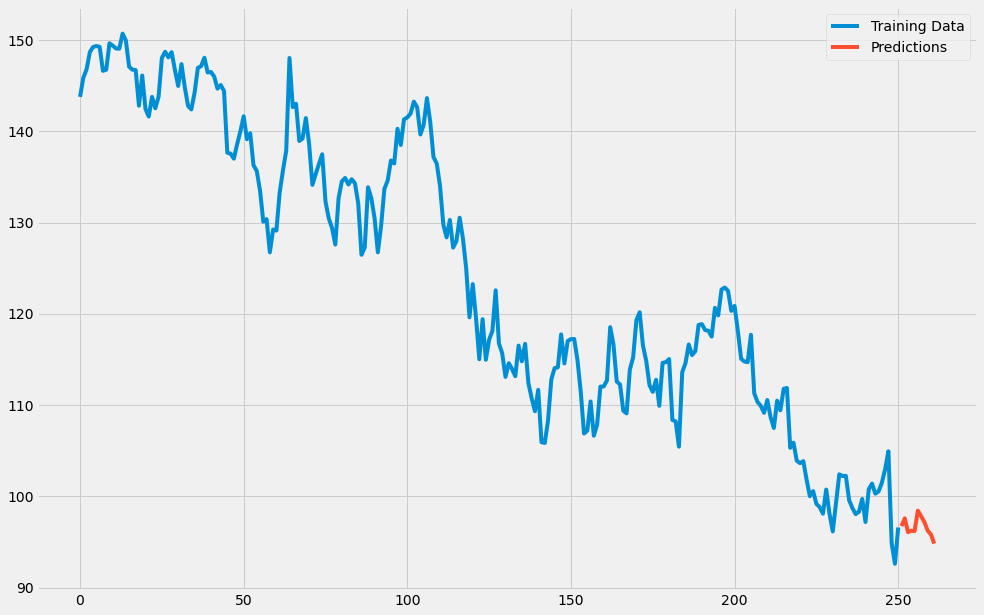

In [32]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15,10))
predictions.plot(legend=True, label="Predictions")